In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [6]:
data = pd.read_csv('salaries.csv')

In [9]:
print(data.head())

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500


In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB
None
       yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000


In [50]:
print('Missing values per column:')
print(data.isnull().sum())

Missing values per column:
yrs.since.phd    0
yrs.service      0
salary           0
rank_AsstProf    0
rank_Prof        0
discipline_B     0
sex_Male         0
dtype: int64


In [13]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print('Categorical columns:', categorical_cols)

Categorical columns: Index(['rank', 'discipline', 'sex'], dtype='object')


In [15]:
# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [16]:
correlation_matrix = data.corr()

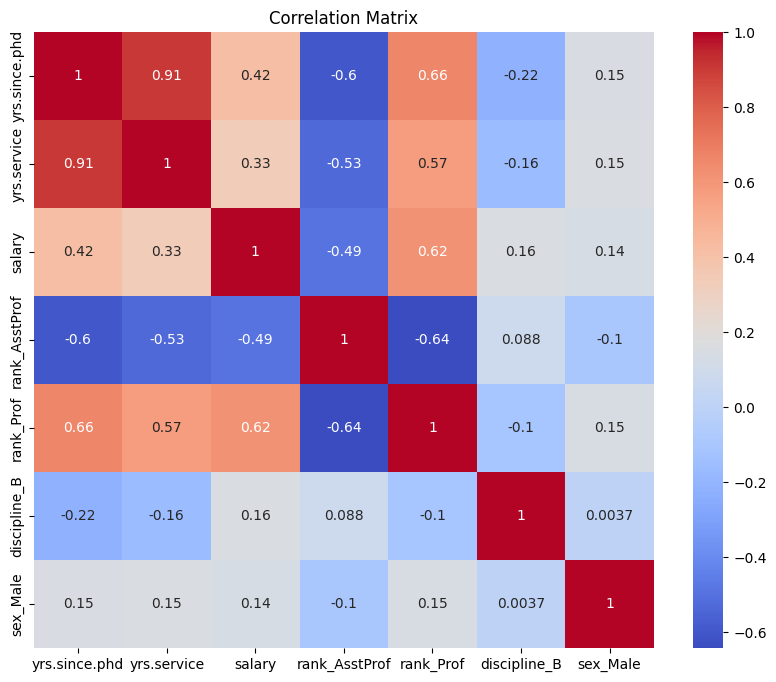

In [17]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

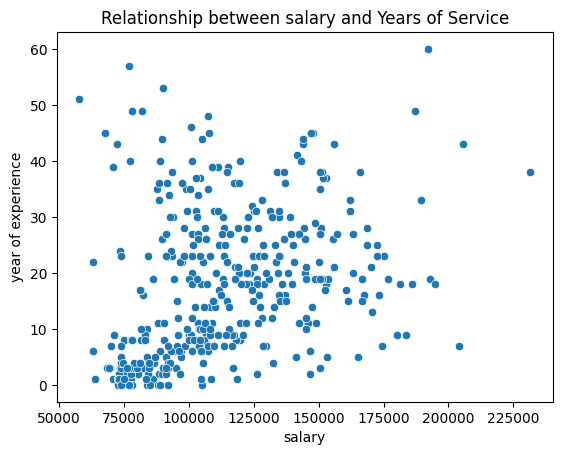

In [52]:
sns.scatterplot(x=data['salary'], y=data['yrs.service'])
plt.title('Relationship between salary and Years of Service')
plt.xlabel('salary')
plt.ylabel('year of experience')
plt.show()

In [53]:
X = data.drop(columns=['salary'])
y = data['salary']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Fit the model to your training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Train the multilinear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Add a constant for statsmodels
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     50.04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           7.69e-43
Time:                        02:49:02   Log-Likelihood:                -3619.2
No. Observations:                 317   AIC:                             7252.
Df Residuals:                     310   BIC:                             7279.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+05   1248.592     91.403      0.0

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 16703.47743313774
Root Mean Squared Error (RMSE): 24181.92066096207


In [32]:
from sklearn.tree import DecisionTreeRegressor

# Train a regression tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [33]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f'Tree Model MAE: {mae_tree}')
print(f'Tree Model RMSE: {rmse_tree}')

Tree Model MAE: 20318.0875
Tree Model RMSE: 28136.339218060155


In [34]:
from sklearn.tree import DecisionTreeRegressor

# Train a regression tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [36]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Tree Model MAE: {mae_tree}")
print(f"Tree Model RMSE: {rmse_tree}")

Tree Model MAE: 20318.0875
Tree Model RMSE: 28136.339218060155


In [37]:
 # Identify important features
 importance = tree_model.feature_importances_
 important_features = pd.DataFrame({"Feature" : X.columns, "Importance" : importance})
 important_features = important_features.sort_values(by="Importance", ascending=False)
 print(important_features)

         Feature  Importance
3      rank_Prof    0.444728
0  yrs.since.phd    0.240701
1    yrs.service    0.219612
4   discipline_B    0.060023
2  rank_AsstProf    0.019945
5       sex_Male    0.014990


In [39]:
# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Tree Regression MAE: {mae_tree}")
print(f"Tree Regression RMSE: {rmse_tree}")

Tree Regression MAE: 20318.0875
Tree Regression RMSE: 28136.339218060155


In [40]:
# Train a random forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest MAE: 17475.894016517857
Random Forest RMSE: 23671.70827210862


In [44]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest MAE: 17475.894016517857
Random Forest RMSE: 23671.70827210862


In [45]:
print("Comparison of Models:")
print(f"Multilinear Regression - MAE: {mae}, RMSE : {rmse}")
print(f"Tree Regression - MAE: {mae_tree}, RMSE: {rmse_tree}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")

Comparison of Models:
Multilinear Regression - MAE: 16703.47743313774, RMSE : 24181.92066096207
Tree Regression - MAE: 20318.0875, RMSE: 28136.339218060155
Random Forest - MAE: 17475.894016517857, RMSE: 23671.70827210862
